In [208]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import japanize_matplotlib

In [209]:
# ファイル読み込み
df = pd.read_csv("result.csv")
# null値の計測
df.isnull().sum()

統計区・町丁名     0
世帯数         0
人口          0
男          35
女          84
年           0
月           0
dtype: int64

In [210]:
# 0値で埋める
# これは隣の町に合算されているため、0で埋めても合計値が変動しないことによる。
df = df.fillna(0)

In [211]:
# null値があるかどうかチェック
df.isnull().sum()

統計区・町丁名    0
世帯数        0
人口         0
男          0
女          0
年          0
月          0
dtype: int64

In [212]:
df

,統計区・町丁名,世帯数,人口,男,女,年,月
0,広坂１丁目,39.0,77.0,35,42,2012,1
1,上柿木畠,12.0,27.0,14,13,2012,1
2,竪町,62.0,125.0,63,62,2012,1
3,里見町,104.0,180.0,81,99,2012,1
4,油車,66.0,136.0,69,67,2012,1
...,...,...,...,...,...,...,...
122143,東荒屋町,8.0,20.0,8.0,12.0,2024,12
122144,袋板屋町,49.0,105.0,44.0,61.0,2024,12
122145,浅川町,38.0,68.0,33.0,35.0,2024,12
122146,上中町,199.0,249.0,148.0,101.0,2024,12


In [213]:
# カッコを消す
# 大額2丁目(大額1丁目から合算) -> 大額2丁目
df["統計区・町丁名"] = (
    df["統計区・町丁名"].str.replace(r"\(.*?\)", "", regex=True).str.strip()
)

In [214]:
# 出てくる町名を全てチェックする。
list(df["統計区・町丁名"].unique())

['広坂１丁目',
 '上柿木畠',
 '竪町',
 '里見町',
 '油車',
 '茨木町',
 '下本多町５番丁',
 '下本多町６番丁',
 '鱗町',
 '新竪町３丁目',
 '枝町',
 '中川除町',
 '杉浦町',
 '水溜町',
 '池田町１番丁',
 '池田町２番丁',
 '池田町３番丁',
 '池田町４番丁',
 '池田町立丁',
 '十三間町',
 '十三間町中丁',
 '大工町',
 '柿木畠',
 '木倉町',
 '片町１丁目',
 '片町２丁目',
 '香林坊１丁目',
 '香林坊２丁目',
 '高岡町',
 '武蔵町',
 '下堤町',
 '博労町',
 '上近江町',
 '下近江町',
 '十間町',
 '下松原町',
 '西町３番丁',
 '西町４番丁',
 '西町藪ノ内通',
 '尾山町',
 '南町',
 '上堤町',
 '長町１丁目',
 '長町２丁目',
 '長町３丁目',
 '中央通町',
 '長土塀１丁目',
 '長土塀２丁目',
 '長土塀３丁目',
 '三社町',
 '昭和町',
 '芳斉１丁目',
 '芳斉２丁目',
 '玉川町',
 '六枚町',
 '尾張町１丁目',
 '尾張町２丁目',
 '主計町',
 '彦三町１丁目',
 '彦三町２丁目',
 '安江町',
 '本町１丁目',
 '本町２丁目',
 '堀川町',
 '堀川新町',
 '袋町',
 '下新町',
 '此花町',
 '笠市町',
 '瓢箪町',
 '丸の内',
 '大手町',
 '橋場町',
 '材木町',
 '横山町',
 '兼六元町',
 '小将町',
 '兼六町',
 '並木町',
 '東兼六町',
 '扇町',
 '暁町',
 '桜町',
 '天神町１丁目',
 '天神町２丁目',
 '田井町',
 '旭町',
 '旭町１丁目',
 '旭町２丁目',
 '旭町３丁目',
 '鈴見台１丁目',
 '鈴見台２丁目',
 '鈴見台３丁目',
 '鈴見台４丁目',
 '鈴見台５丁目',
 '鈴見町',
 '若松町',
 '若松町１丁目',
 '若松町２丁目',
 '若松町３丁目',
 '上若松町',
 '田上町',
 '田上１丁目',
 '田上２丁目',
 '田上新町',
 '田上本町',
 '太陽が丘２丁目',
 '太陽が丘３丁目',
 '太

# 抽出

- 額地区を抽出する


In [215]:
nuka_towns = [
    "額新町1丁目",
    "額新町2丁目",
    "光が丘1丁目",
    "光が丘2丁目",
    "光が丘3丁目",
    "額谷町",
    "額谷1丁目",
    "額谷2丁目",
    "額谷3丁目",
    "大額1丁目",
    "大額2丁目",
    "大額3丁目",
    "四十万町",
    "四十万3丁目",
    "四十万4丁目",
    "四十万5丁目",
    "四十万6丁目",
    "南四十万1丁目",
    "南四十万2丁目",
    "南四十万3丁目",
    "しじま台1丁目",
    "しじま台2丁目",
    "三十苅町",
    "額乙丸町",
    "大額町",
    "額新保1丁目",
    "額新保2丁目",
    "額新保3丁目",
    "馬替1丁目",
    "馬替2丁目",
    "馬替3丁目",
]

# データフレームから額地区の町を抽出
nuka_area_df = df[df["統計区・町丁名"].isin(nuka_towns)]

In [216]:
# データ確認
nuka_area_df

,統計区・町丁名,世帯数,人口,男,女,年,月
307,額谷町,70.0,200.0,92,108,2012,1
311,四十万町,760.0,2121.0,1020,1101,2012,1
321,三十苅町,700.0,1762.0,849,913,2012,1
322,額乙丸町,536.0,1419.0,661,758,2012,1
323,大額町,113.0,268.0,127,141,2012,1
...,...,...,...,...,...,...,...
121636,額谷町,71.0,186.0,85.0,101.0,2024,12
121640,四十万町,902.0,2222.0,1105.0,1117.0,2024,12
121650,三十苅町,672.0,1419.0,684.0,735.0,2024,12
121651,額乙丸町,623.0,1431.0,688.0,743.0,2024,12


In [217]:
nuka_area_df

,統計区・町丁名,世帯数,人口,男,女,年,月
307,額谷町,70.0,200.0,92,108,2012,1
311,四十万町,760.0,2121.0,1020,1101,2012,1
321,三十苅町,700.0,1762.0,849,913,2012,1
322,額乙丸町,536.0,1419.0,661,758,2012,1
323,大額町,113.0,268.0,127,141,2012,1
...,...,...,...,...,...,...,...
121636,額谷町,71.0,186.0,85.0,101.0,2024,12
121640,四十万町,902.0,2222.0,1105.0,1117.0,2024,12
121650,三十苅町,672.0,1419.0,684.0,735.0,2024,12
121651,額乙丸町,623.0,1431.0,688.0,743.0,2024,12


In [218]:
nuka_area_df.to_csv("sample.csv", index=False)

# グラフ化

- 年度ごとの推移をグラフにプロットする


In [219]:
# データを数値型に変換
nuka_area_df["人口"] = pd.to_numeric(nuka_area_df["人口"], errors="coerce")
# 欠損がある場合は0で埋める
nuka_area_df["人口"] = nuka_area_df["人口"].fillna(0)  # 欠損値を0で埋める

/tmp/ipykernel_8101/1392624258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuka_area_df["人口"] = pd.to_numeric(nuka_area_df["人口"], errors="coerce")
/tmp/ipykernel_8101/1392624258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuka_area_df["人口"] = nuka_area_df["人口"].fillna(0)  # 欠損値を0で埋める


In [220]:
# 2012年は省く
nuka_area_df = nuka_area_df[nuka_area_df["年"] != 2012]

In [221]:
nuka_area_df.groupby("年")["人口"].sum()

年
2013    69102.0
2014    68577.0
2015    68207.0
2016    67968.0
2017    67623.0
2018    67460.0
2019    67278.0
2020    67060.0
2021    67203.0
2022    66916.0
2023    66071.0
2024    65736.0
Name: 人口, dtype: float64

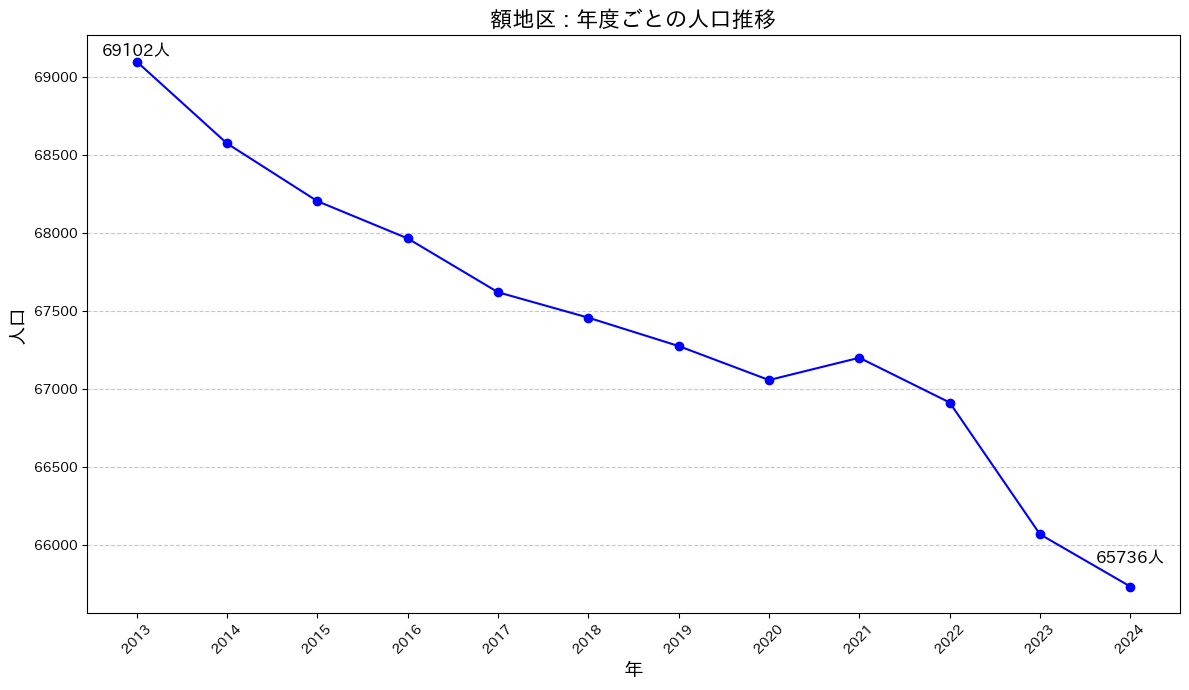

In [240]:
# 年度ごとに人口を集計
yearly_population = nuka_area_df.groupby("年")["人口"].sum()

# グラフの描画
plt.figure(figsize=(12, 7))
plt.plot(
    yearly_population.index,
    yearly_population.values,
    marker="o",
    linestyle="-",
    color="b",
)
plt.xlabel("年", fontsize=14)
plt.ylabel("人口", fontsize=14)
plt.title("額地区 : 年度ごとの人口推移", fontsize=16)
plt.xticks(yearly_population.index, rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 特定の年度に数値を表示
for year in [2013, 2024]:
    if year in yearly_population.index:
        offset = (
            0.0002 * yearly_population.max()
            if year == 2013
            else 0.0019 * yearly_population.max()
        )
        plt.text(
            year,
            yearly_population[year] + offset,
            f"{int(yearly_population[year])}人",
            fontsize=12,
            ha="center",
            va="bottom",
        )

plt.tight_layout()
plt.show()